# PTM Dataset Analysis

## Replacement Statistics and Token Counts
Use this notebook to review PTM token coverage, spot annotation conflicts, and audit duplicate records across datasets.


In [ ]:
import csv
import re
from collections import Counter
from typing import Dict

PTM_PATTERN = re.compile(r"<([^>]+)>")


def count_ptm_replacements(file_path: str) -> Dict[str, object]:
    """
    @param file_path: Absolute path to CSV with ori_seq and ptm_seq columns.
    @returns: Dict containing row stats and counters for PTM replacements.
    """
    token_counts: Counter = Counter()
    pair_counts: Counter = Counter()
    total = 0
    aligned = 0

    with open(file_path, newline="") as fh:
        reader = csv.DictReader(fh)
        for row in reader:
            total += 1
            ori = row["ori_seq"]
            ptm = row["ptm_seq"]

            i_ori = 0
            i_ptm = 0
            ok = True

            while i_ptm < len(ptm):
                ch = ptm[i_ptm]
                if ch == "<":
                    end = ptm.find(">", i_ptm + 1)
                    if end == -1:
                        ok = False
                        break
                    token = ptm[i_ptm + 1 : end]
                    if i_ori >= len(ori):
                        ok = False
                        break
                    token_counts[token] += 1
                    pair_counts[(ori[i_ori], token)] += 1
                    i_ori += 1
                    i_ptm = end + 1
                    continue

                # Plain amino acid must match.
                if i_ori >= len(ori) or ch != ori[i_ori]:
                    ok = False
                    break
                i_ori += 1
                i_ptm += 1

            if i_ori != len(ori):
                ok = False

            if ok:
                aligned += 1

    return {
        "total_rows": total,
        "aligned_rows": aligned,
        "mismatch_rows": total - aligned,
        "token_counts": token_counts,
        "pair_counts": pair_counts,
    }


def print_top(counter: Counter, n: int = 15, label: str = "top") -> None:
    """
    @param counter: Counter to display.
    @param n: How many entries to show.
    @param label: Title for the printed block.
    @returns: None.
    """
    for item, cnt in counter.items():
        print(f"  {item}: {cnt}")


ptm_path = "/home/zz/zheng/ptm-mlm/datasets/ptm.csv"
mamba_path = "/home/zz/zheng/ptm-mlm/datasets/mamba.csv"

ptm_stats = count_ptm_replacements(ptm_path)
mamba_stats = count_ptm_replacements(mamba_path)


PTM dataset rows: 200535 aligned: 200535 mismatch: 0
PTM token frequencies (top 20)
  Phosphoserine: 858062
  Phosphothreonine: 316008
  N6-acetyllysine: 184889
  Phosphotyrosine: 108007
  N-linked (GlcNAc...) asparagine: 26497
  N6-succinyllysine: 16784
  O-linked (GalNAc...) threonine: 11704
  Omega-N-methylarginine: 10262
  S-palmitoyl cysteine: 4977
  N-acetylalanine: 2053
  4-hydroxyproline: 1810
  N-acetylmethionine: 1415
  N-acetylserine: 1048
  Sulfotyrosine: 213
  Asymmetric dimethylarginine: 122
  N5-methylglutamine: 105
  N6-carboxylysine: 46
  4-carboxyglutamate: 36
PTM replacements (ori->token) (top 20)
  ('S', 'Phosphoserine'): 858062
  ('T', 'Phosphothreonine'): 316008
  ('K', 'N6-acetyllysine'): 184889
  ('Y', 'Phosphotyrosine'): 108007
  ('N', 'N-linked (GlcNAc...) asparagine'): 26497
  ('K', 'N6-succinyllysine'): 16784
  ('R', 'Omega-N-methylarginine'): 10262
  ('S', 'O-linked (GalNAc...) threonine'): 5872
  ('T', 'O-linked (GalNAc...) threonine'): 5832
  ('C', 'S-pal

In [20]:
for key, value in ptm_stats['pair_counts'].items():
    print(f"{key}: {value}")

('S', 'Phosphoserine'): 227638
('N', 'N-linked (GlcNAc...) asparagine'): 199660
('R', 'Omega-N-methylarginine'): 4872
('K', 'N6-acetyllysine'): 35522
('Y', 'Phosphotyrosine'): 18928
('T', 'Phosphothreonine'): 48974
('K', 'N6-succinyllysine'): 6514
('A', 'N-acetylalanine'): 7806
('S', 'O-linked (GalNAc...) threonine'): 5872
('M', 'N-acetylmethionine'): 6284
('C', 'S-palmitoyl cysteine'): 5760
('S', 'N-acetylserine'): 3830
('T', 'O-linked (GalNAc...) threonine'): 3536
('K', 'N6-carboxylysine'): 4262
('R', 'Asymmetric dimethylarginine'): 2212
('P', '4-hydroxyproline'): 8404
('Q', 'N5-methylglutamine'): 2884
('Y', 'Sulfotyrosine'): 2046
('E', '4-carboxyglutamate'): 2298
('Q', 'Pyrrolidone carboxylic acid'): 3206
('K', 'Phosphoserine'): 2
('R', 'Phosphoserine'): 2
('C', 'S-diacylglycerol cysteine'): 4432
('K', 'N6-(pyridoxal phosphate)lysine'): 13304
('S', "O-(pantetheine 4'-phosphoryl)serine"): 3880
('G', 'N-myristoyl glycine'): 2110
('D', '4-aspartylphosphate'): 2066
('C', 'S-geranylgeran

In [13]:
total_stats = {}
total_stats.update(ptm_stats)
total_stats

{'total_rows': 200535,
 'aligned_rows': 200535,
 'mismatch_rows': 0,
 'token_counts': Counter({'Phosphoserine': 858062,
          'Phosphothreonine': 316008,
          'N6-acetyllysine': 184889,
          'Phosphotyrosine': 108007,
          'N-linked (GlcNAc...) asparagine': 26497,
          'N6-succinyllysine': 16784,
          'O-linked (GalNAc...) threonine': 11704,
          'Omega-N-methylarginine': 10262,
          'S-palmitoyl cysteine': 4977,
          'N-acetylalanine': 2053,
          '4-hydroxyproline': 1810,
          'N-acetylmethionine': 1415,
          'N-acetylserine': 1048,
          'Sulfotyrosine': 213,
          'Asymmetric dimethylarginine': 122,
          'N5-methylglutamine': 105,
          'N6-carboxylysine': 46,
          '4-carboxyglutamate': 36}),
 'pair_counts': Counter({('S', 'Phosphoserine'): 858062,
          ('T', 'Phosphothreonine'): 316008,
          ('K', 'N6-acetyllysine'): 184889,
          ('Y', 'Phosphotyrosine'): 108007,
          ('N', 'N-linke

In [15]:
for key, value in mamba_stats['token_counts'].items():
    total_stats['token_counts'][key] = value + mamba_stats['token_counts'][key]
for key, value in mamba_stats['pair_counts'].items():
    total_stats['pair_counts'][key] = value + mamba_stats['pair_counts'][key]
len(total_stats['token_counts'])

25

In [16]:
total_stats['token_counts']

Counter({'Phosphoserine': 227644,
         'N-linked (GlcNAc...) asparagine': 199660,
         'Phosphothreonine': 48974,
         'N6-acetyllysine': 35522,
         'Phosphotyrosine': 18960,
         'N6-(pyridoxal phosphate)lysine': 13304,
         '4-hydroxyproline': 8404,
         'N-acetylalanine': 7806,
         'N6-succinyllysine': 6514,
         'N-acetylmethionine': 6284,
         'S-palmitoyl cysteine': 5760,
         'Omega-N-methylarginine': 4872,
         'S-diacylglycerol cysteine': 4432,
         'N6-carboxylysine': 4262,
         "O-(pantetheine 4'-phosphoryl)serine": 3880,
         'N-acetylserine': 3830,
         'O-linked (GalNAc...) threonine': 3536,
         'Pyrrolidone carboxylic acid': 3206,
         'N5-methylglutamine': 2884,
         '4-carboxyglutamate': 2298,
         'S-geranylgeranyl cysteine': 2234,
         'Asymmetric dimethylarginine': 2212,
         'N-myristoyl glycine': 2110,
         '4-aspartylphosphate': 2066,
         'Sulfotyrosine': 2046})

In [21]:
from collections import defaultdict
from typing import Dict, List, Tuple


def find_conflicting_ptm_tokens(file_path: str, limit: int = 10) -> Dict[str, object]:
    """
    @param file_path: Absolute path to CSV with ori_seq and ptm_seq columns.
    @param limit: Max number of conflict examples to return.
    @returns: Dict with unique ori count, conflict count, and sample conflicts.
    """
    variants: Dict[str, Counter] = defaultdict(Counter)

    with open(file_path, newline="") as fh:
        reader = csv.DictReader(fh)
        for row in reader:
            ori_seq = row["ori_seq"]
            ptm_seq = row["ptm_seq"]
            variants[ori_seq][ptm_seq] += 1

    conflicts: List[Dict[str, object]] = []
    for ori_seq, ptm_counter in variants.items():
        if len(ptm_counter) > 1:
            conflicts.append(
                {
                    "ori_seq": ori_seq,
                    "variant_count": len(ptm_counter),
                    "variants": ptm_counter.most_common(),
                }
            )

    conflicts.sort(key=lambda item: item["variant_count"], reverse=True)

    return {
        "unique_ori_seq": len(variants),
        "conflict_count": len(conflicts),
        "conflicts": conflicts[:limit],
    }


def print_conflicts(label: str, stats: Dict[str, object]) -> None:
    """
    @param label: Dataset label for display.
    @param stats: Result from find_conflicting_ptm_tokens.
    @returns: None.
    """
    print(f"=== {label} ===")
    print(
        f"Unique ori_seq: {stats['unique_ori_seq']} | Conflicts: {stats['conflict_count']}"
    )
    for conflict in stats["conflicts"]:
        print(f"ori_seq (len={len(conflict['ori_seq'])}): {conflict['ori_seq']}")
        for ptm_seq, cnt in conflict["variants"]:
            print(f"  ptm_seq (count={cnt}): {ptm_seq}")
        print("---")


ptm_conflicts = find_conflicting_ptm_tokens(ptm_path, limit=10)
mamba_conflicts = find_conflicting_ptm_tokens(mamba_path, limit=10)

print_conflicts("PTM", ptm_conflicts)
print_conflicts("Mamba", mamba_conflicts)



=== PTM ===
Unique ori_seq: 196995 | Conflicts: 2363
ori_seq (len=136): MARTKQTARKSTGGKAPRKQLATKAARKSAPTTGGVKKPHRYRPGTVALREIRKYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSHAVLALQEAAEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
  ptm_seq (count=2): MAR<Phosphothreonine>KQTARK<Phosphoserine><Phosphothreonine>GGKAPRKQLATKAARK<Phosphoserine>APTTGGVKKPHRYRPGTVALREIRKYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSHAVLALQEAAEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
  ptm_seq (count=1): MARTKQTAR<N6-acetyllysine><Phosphoserine><Phosphothreonine>GG<N6-acetyllysine>APR<N6-acetyllysine>QLAT<N6-acetyllysine>AARK<Phosphoserine>APTTGGVKKPHRYRPGTVALREIRKY<N5-methylglutamine>KSTELLIRKLPFQRLVREIAQDFKTDLRFQSHAVLALQEAAEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
  ptm_seq (count=1): MARTKQTAR<N6-acetyllysine>STGG<N6-acetyllysine>APR<N6-acetyllysine>QLAT<N6-acetyllysine>AAR<N6-acetyllysine>SAPTTGGVKKPHRYRPGTVALREIRKYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSHAVLALQEAAEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
  ptm_seq (count=1): MARTKQTAR<N6-acetyllysine>

## Single-Position Token Conflicts
Detect conflicts that occur at a single token position within equally long PTM tokenized sequences.



In [22]:
from typing import Any


def tokenize_ptm_seq(ptm_seq: str) -> List[str]:
    """
    @param ptm_seq: PTM-annotated sequence with tokens enclosed in <>.
    @returns: List of tokens mixing single residues and PTM markers.
    """
    tokens: List[str] = []
    i = 0
    while i < len(ptm_seq):
        ch = ptm_seq[i]
        if ch == "<":
            end = ptm_seq.find(">", i + 1)
            if end == -1:
                break
            tokens.append(ptm_seq[i : end + 1])
            i = end + 1
        else:
            tokens.append(ch)
            i += 1
    return tokens


def find_single_position_token_conflicts(
    file_path: str, limit: int = 10
) -> Dict[str, Any]:
    """
    @param file_path: Absolute path to CSV with ori_seq and ptm_seq columns.
    @param limit: Max number of conflict examples to keep in the sample list.
    @returns: Dict with unique ori count, total conflict count, and samples.
    """
    variants: Dict[str, Counter] = defaultdict(Counter)
    with open(file_path, newline="") as fh:
        reader = csv.DictReader(fh)
        for row in reader:
            variants[row["ori_seq"]][row["ptm_seq"]] += 1

    total_conflicts = 0
    samples: List[Dict[str, Any]] = []

    for ori_seq, ptm_counter in variants.items():
        entries: List[Tuple[str, List[str], int]] = []
        for ptm_seq, cnt in ptm_counter.items():
            entries.append((ptm_seq, tokenize_ptm_seq(ptm_seq), cnt))

        length_groups: Dict[int, List[Tuple[str, List[str], int]]] = defaultdict(list)
        for ptm_seq, tokens, cnt in entries:
            length_groups[len(tokens)].append((ptm_seq, tokens, cnt))

        for _, group in length_groups.items():
            pattern_map: Dict[Tuple[int, Tuple[str, ...]], List[Tuple[str, str, int]]] = defaultdict(list)
            for ptm_seq, tokens, cnt in group:
                for idx, token in enumerate(tokens):
                    pattern = tuple(tokens[:idx] + ["__WILD__"] + tokens[idx + 1 :])
                    pattern_map[(idx, pattern)].append((ptm_seq, token, cnt))

            for (idx, _), bucket in pattern_map.items():
                token_set = {token for _, token, _ in bucket}
                if len(token_set) <= 1:
                    continue

                total_conflicts += 1
                if len(samples) < limit:
                    ptm_variants = [
                        {"ptm_seq": seq, "token": token, "count": cnt}
                        for seq, token, cnt in sorted(
                            bucket, key=lambda item: item[2], reverse=True
                        )
                    ]
                    samples.append(
                        {
                            "ori_seq": ori_seq,
                            "position": idx,
                            "variant_count": len(ptm_variants),
                            "ptm_variants": ptm_variants,
                        }
                    )

    return {
        "unique_ori_seq": len(variants),
        "conflict_count": total_conflicts,
        "conflicts": samples,
    }


def print_single_position_conflicts(label: str, stats: Dict[str, Any]) -> None:
    """
    @param label: Dataset label for display.
    @param stats: Result from find_single_position_token_conflicts.
    @returns: None.
    """
    print(f"=== {label} single-position token conflicts ===")
    print(
        f"Unique ori_seq: {stats['unique_ori_seq']} | Conflicts: {stats['conflict_count']} (showing up to {len(stats['conflicts'])})"
    )
    for conflict in stats["conflicts"]:
        print(
            f"ori_seq len={len(conflict['ori_seq'])}, position={conflict['position']}, variants={conflict['variant_count']}"
        )
        for variant in conflict["ptm_variants"]:
            print(
                f"  token={variant['token']} | count={variant['count']} | ptm_seq={variant['ptm_seq']}"
            )
        print("---")


ptm_single_pos = find_single_position_token_conflicts(ptm_path, limit=10)
mamba_single_pos = find_single_position_token_conflicts(mamba_path, limit=10)

print_single_position_conflicts("PTM", ptm_single_pos)
print_single_position_conflicts("Mamba", mamba_single_pos)



=== PTM single-position token conflicts ===
Unique ori_seq: 196995 | Conflicts: 366 (showing up to 10)
ori_seq len=251, position=143, variants=2
  token=<N6-acetyllysine> | count=1 | ptm_seq=MSFPSSPPALPAIVARFAVGRPVRAVWVNELGGVTFRVDSGMGAGCEFIKVARRGTADFANEARRLRWAAPYLAVPRVLGVGVDGDWAWLHTDALPGLSAVHPRWRASPQVAVPALGAGLRTLHDSLPVHSCPFDWSTASRLA<N6-acetyllysine>LAPARRAELGDSPPVDRLVVCHGDACSPNTILDDTGRCCGHVDFGNLGVADRWADLAVATLSLQWNFPDYPGQVRDDEFFAAYGVAPDPARIDYYRRLWQAEDD<Phosphoserine><Phosphoserine>R
  token=K | count=1 | ptm_seq=MSFPSSPPALPAIVARFAVGRPVRAVWVNELGGVTFRVDSGMGAGCEFIKVARRGTADFANEARRLRWAAPYLAVPRVLGVGVDGDWAWLHTDALPGLSAVHPRWRASPQVAVPALGAGLRTLHDSLPVHSCPFDWSTASRLAKLAPARRAELGDSPPVDRLVVCHGDACSPNTILDDTGRCCGHVDFGNLGVADRWADLAVATLSLQWNFPDYPGQVRDDEFFAAYGVAPDPARIDYYRRLWQAEDD<Phosphoserine><Phosphoserine>R
---
ori_seq len=261, position=68, variants=2
  token=<N6-acetyllysine> | count=1 | ptm_seq=MAEPFFRMMEILVPSIVAANGNKITFEGLENIPERGGALIALNHTSYVDWVPASIAAHHRRRRLRFMI<N6-acetyllysine>AEMQDVRAVNYVIKHAQLIPVDRSVGA

## Duplicate Pair Audit
Summarize duplicate (ori_seq, ptm_seq) pairs per dataset and highlight shared records across files.



In [ ]:
import csv
from collections import Counter
from itertools import islice
from pathlib import Path
from typing import Dict, List, Tuple, Set

ptm_path = Path("/home/zz/zheng/ptm-mlm/datasets/ptm.csv")
mamba_path = Path("/home/zz/zheng/ptm-mlm/datasets/mamba.csv")


def summarize_duplicate_pairs(
    file_path: Path,
    key_cols: Tuple[str, str] = ("ori_seq", "ptm_seq")
) -> Dict[str, object]:
    """
    /**
     * @param file_path Absolute path to the CSV.
     * @param key_cols Column names in order: (ori_seq, ptm_seq).
     * @param top_n How many top duplicate pairs to keep for display.
     * @returns Summary dict with counts and top duplicate pairs.
     */
    """
    counts: Counter[Tuple[str, str]] = Counter()
    total_rows = 0

    with file_path.open(newline="") as fh:
        reader = csv.DictReader(fh)
        for row in reader:
            total_rows += 1
            key = (row[key_cols[0]], row[key_cols[1]])
            counts[key] += 1

    dup_counts: Dict[Tuple[str, str], int] = {k: v for k, v in counts.items() if v > 1}
    top_dups: List[Tuple[Tuple[str, str], int]] = sorted(
        dup_counts.items(), key=lambda kv: kv[1], reverse=True
    )

    return {
        "file": str(file_path),
        "total_rows": total_rows,
        "duplicate_rows": sum(dup_counts.values()),
        "unique_duplicate_pairs": len(dup_counts),
        "top_dups": top_dups,
        "pair_keys": set(counts.keys()),
    }


def print_dup_summary(label: str, summary: Dict[str, object], sample_len: int = 30) -> None:
    """
    /**
     * @param label Dataset label for printing.
     * @param summary Output from summarize_duplicate_pairs.
     * @param sample_len Max chars to show per sequence in samples.
     * @returns None (prints a small report).
     */
    """
    print(f"== {label} ==")
    print(f"rows: {summary['total_rows']:,}")
    print(f"duplicate rows (same ori_seq+ptm_seq): {summary['duplicate_rows']:,}")
    print(f"unique duplicate pairs: {summary['unique_duplicate_pairs']:,}")
    if summary["top_dups"]:
        print("top duplicate pairs:")
        for (ori, ptm), cnt in summary["top_dups"]:
            print(
                f"  count={cnt} | ori_seq={ori[:sample_len]}... | ptm_seq={ptm[:sample_len]}..."
            )
    print()


def print_shared_pairs(
    label_a: str,
    label_b: str,
    summary_a: Dict[str, object],
    summary_b: Dict[str, object],
    limit: int = 5,
    sample_len: int = 30,
) -> None:
    """
    /**
     * @param label_a Label for first dataset.
     * @param label_b Label for second dataset.
     * @param summary_a First summary dict.
     * @param summary_b Second summary dict.
     * @param limit Max shared pairs to print.
     * @param sample_len Max chars to show per sequence in samples.
     * @returns None (prints shared pair info).
     */
    """
    shared: Set[Tuple[str, str]] = summary_a["pair_keys"] & summary_b["pair_keys"]
    print(f"Cross-file shared (ori_seq, ptm_seq) pairs: {len(shared):,}")
    for ori, ptm in islice(shared, limit):
        print(f"  ori_seq={ori[:sample_len]}... | ptm_seq={ptm[:sample_len]}...")
    print()


ptm_summary = summarize_duplicate_pairs(ptm_path)
mamba_summary = summarize_duplicate_pairs(mamba_path)

print_dup_summary("PTM", ptm_summary)
print_dup_summary("Mamba", mamba_summary)
print_shared_pairs("PTM", "Mamba", ptm_summary, mamba_summary, limit=5)

== PTM ==
rows: 200,535
duplicate rows (same ori_seq+ptm_seq): 1,480
unique duplicate pairs: 712
top duplicate pairs:
  count=8 | ori_seq=MSHQLTFADSEFSSKRRQTRKEIFLSRMEQ... | ptm_seq=MSHQLTFADSEFSSKRRQTRKEIFLSRMEQ...
  count=6 | ori_seq=MIDVLGPEKRRRRTTQEKIAIVQQSFEPGM... | ptm_seq=MIDVLGPE<N6-acetyllysine>RRRRT...
  count=5 | ori_seq=MTKTVSTSKKPRKQHSPEFRSEALKLAERI... | ptm_seq=MTKTVSTSKKPRKQHSPEFRSEAL<N6-ac...
  count=5 | ori_seq=MSGRGKQGGKARAKAKTRSSRAGLQFPVGR... | ptm_seq=M<Phosphoserine>G<Omega-N-meth...
  count=5 | ori_seq=MEQTFVAIKPDGVQRGLCGEVMKFIQPMKH... | ptm_seq=<N-acetylmethionine>EQTFVAIKPD...
  count=5 | ori_seq=MGLKVNVSAIFMAVLLTLQTPTGQIHWGNL... | ptm_seq=MGLKVNVSAIFMAVLLTLQTPTGQIHWG<N...
  count=5 | ori_seq=QQDYTGWMDF... | ptm_seq=QQD<Sulfotyrosine>TGWMDF...
  count=5 | ori_seq=MESQQLSNYPHISHGSACASVTSKEVHTNQ... | ptm_seq=MESQQLSNYPHI<Phosphoserine>HG<...
  count=4 | ori_seq=AFSGILAEADIAAALKACEAADSFNYKAFF... | ptm_seq=<N-acetylalanine>FSGILAEADIAAA...
  count=4 | ori_seq=MSWRGR

## Sequence Length Distribution
Analyze and compare sequence length distributions for PTM and Mamba datasets.


In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from typing import Dict, List, Tuple

ptm_path = "/home/zz/zheng/ptm-mlm/datasets/ptm.csv"
mamba_path = "/home/zz/zheng/ptm-mlm/datasets/mamba.csv"


def get_sequence_lengths(file_path: str, seq_column: str = "ori_seq") -> List[int]:
    """
    Extract sequence lengths from CSV file.
    
    @param file_path: Absolute path to CSV file.
    @param seq_column: Column name containing sequences (default: "ori_seq").
    @returns: List of sequence lengths.
    """
    lengths: List[int] = []
    with open(file_path, newline="") as fh:
        reader = csv.DictReader(fh)
        for row in reader:
            seq = row[seq_column]
            lengths.append(len(seq))
    return lengths


def calculate_length_statistics(lengths: List[int]) -> Dict[str, float]:
    """
    Calculate statistical measures for sequence lengths.
    
    @param lengths: List of sequence lengths.
    @returns: Dictionary with statistical measures.
    """
    arr = np.array(lengths)
    return {
        "count": len(lengths),
        "mean": float(np.mean(arr)),
        "median": float(np.median(arr)),
        "std": float(np.std(arr)),
        "min": int(np.min(arr)),
        "max": int(np.max(arr)),
        "q25": float(np.percentile(arr, 25)),
        "q75": float(np.percentile(arr, 75)),
        "q90": float(np.percentile(arr, 90)),
        "q95": float(np.percentile(arr, 95)),
        "q99": float(np.percentile(arr, 99)),
    }


def print_statistics(label: str, stats: Dict[str, float]) -> None:
    """
    Print formatted statistics.
    
    @param label: Dataset label.
    @param stats: Statistics dictionary.
    @returns: None.
    """
    print(f"=== {label} Sequence Length Statistics ===")
    print(f"Total sequences: {stats['count']:,}")
    print(f"Mean: {stats['mean']:.2f}")
    print(f"Median: {stats['median']:.2f}")
    print(f"Std: {stats['std']:.2f}")
    print(f"Min: {stats['min']}")
    print(f"Max: {stats['max']}")
    print(f"Q25: {stats['q25']:.2f}")
    print(f"Q75: {stats['q75']:.2f}")
    print(f"Q90: {stats['q90']:.2f}")
    print(f"Q95: {stats['q95']:.2f}")
    print(f"Q99: {stats['q99']:.2f}")
    print()


# Get sequence lengths for both datasets
ptm_lengths = get_sequence_lengths(ptm_path, "ori_seq")
mamba_lengths = get_sequence_lengths(mamba_path, "ori_seq")

# Calculate statistics
ptm_stats = calculate_length_statistics(ptm_lengths)
mamba_stats = calculate_length_statistics(mamba_lengths)

# Print statistics
print_statistics("PTM", ptm_stats)
print_statistics("Mamba", mamba_stats)


=== PTM Sequence Length Statistics ===
Total sequences: 199,767
Mean: 582.22
Median: 455.00
Std: 533.84
Min: 5
Max: 32767
Q25: 282.00
Q75: 714.00
Q90: 1091.00
Q95: 1435.00
Q99: 2538.34

=== Mamba Sequence Length Statistics ===
Total sequences: 79,887
Mean: 545.10
Median: 427.00
Std: 520.99
Min: 3
Max: 35213
Q25: 287.00
Q75: 629.00
Q90: 981.00
Q95: 1349.00
Q99: 2572.98



/tmp/ipykernel_1713213/928664885.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(box_data, labels=["PTM", "Mamba"], patch_artist=True)


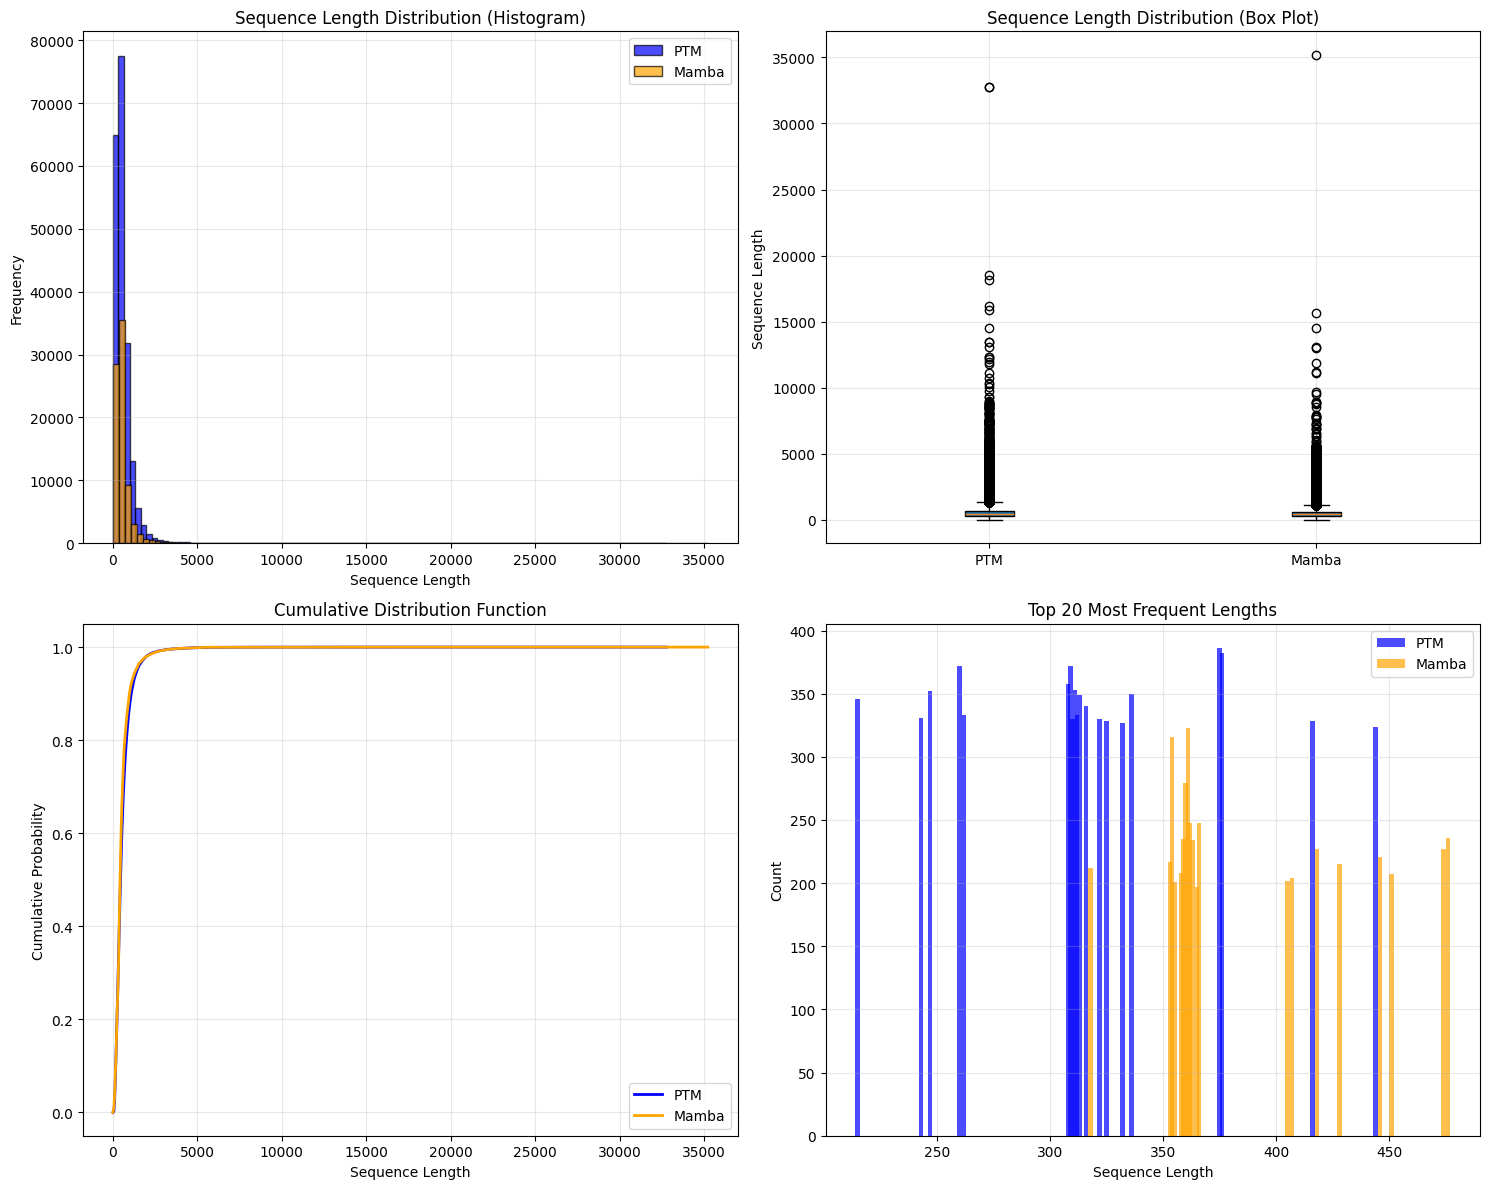

In [5]:
# Visualize length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram comparison
axes[0, 0].hist(ptm_lengths, bins=100, alpha=0.7, label="PTM", color="blue", edgecolor="black")
axes[0, 0].hist(mamba_lengths, bins=100, alpha=0.7, label="Mamba", color="orange", edgecolor="black")
axes[0, 0].set_xlabel("Sequence Length")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Sequence Length Distribution (Histogram)")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot comparison
box_data = [ptm_lengths, mamba_lengths]
axes[0, 1].boxplot(box_data, labels=["PTM", "Mamba"], patch_artist=True)
axes[0, 1].set_ylabel("Sequence Length")
axes[0, 1].set_title("Sequence Length Distribution (Box Plot)")
axes[0, 1].grid(True, alpha=0.3)

# Cumulative distribution
sorted_ptm = np.sort(ptm_lengths)
sorted_mamba = np.sort(mamba_lengths)
axes[1, 0].plot(sorted_ptm, np.arange(1, len(sorted_ptm) + 1) / len(sorted_ptm), 
                label="PTM", linewidth=2, color="blue")
axes[1, 0].plot(sorted_mamba, np.arange(1, len(sorted_mamba) + 1) / len(sorted_mamba), 
                label="Mamba", linewidth=2, color="orange")
axes[1, 0].set_xlabel("Sequence Length")
axes[1, 0].set_ylabel("Cumulative Probability")
axes[1, 0].set_title("Cumulative Distribution Function")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Length frequency (top lengths)
ptm_length_counter = Counter(ptm_lengths)
mamba_length_counter = Counter(mamba_lengths)
top_ptm_lengths = dict(ptm_length_counter.most_common(20))
top_mamba_lengths = dict(mamba_length_counter.most_common(20))

x_ptm = list(top_ptm_lengths.keys())
y_ptm = list(top_ptm_lengths.values())
x_mamba = list(top_mamba_lengths.keys())
y_mamba = list(top_mamba_lengths.values())

axes[1, 1].bar([x - 1 for x in x_ptm], y_ptm, width=2, alpha=0.7, label="PTM", color="blue")
axes[1, 1].bar([x + 1 for x in x_mamba], y_mamba, width=2, alpha=0.7, label="Mamba", color="orange")
axes[1, 1].set_xlabel("Sequence Length")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_title("Top 20 Most Frequent Lengths")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [6]:
# Detailed length distribution table
def get_length_distribution_table(lengths: List[int], bins: List[int]) -> Dict[str, int]:
    """
    Count sequences in each length bin.
    
    @param lengths: List of sequence lengths.
    @param bins: List of bin boundaries (e.g., [0, 50, 100, 200, ...]).
    @returns: Dictionary mapping bin ranges to counts.
    """
    distribution: Dict[str, int] = {}
    arr = np.array(lengths)
    
    for i in range(len(bins) - 1):
        bin_label = f"{bins[i]}-{bins[i+1]-1}"
        count = np.sum((arr >= bins[i]) & (arr < bins[i+1]))
        distribution[bin_label] = int(count)
    
    # Last bin: >= last boundary
    bin_label = f">={bins[-1]}"
    count = np.sum(arr >= bins[-1])
    distribution[bin_label] = int(count)
    
    return distribution


# Define bins for length distribution
bins = [0, 50, 100, 200, 300, 500, 1000, 2000, 5000]

ptm_dist = get_length_distribution_table(ptm_lengths, bins)
mamba_dist = get_length_distribution_table(mamba_lengths, bins)

print("=== Length Distribution by Bins ===")
print(f"{'Length Range':<15} {'PTM Count':<15} {'PTM %':<10} {'Mamba Count':<15} {'Mamba %':<10}")
print("-" * 70)

for bin_range in sorted(set(list(ptm_dist.keys()) + list(mamba_dist.keys()))):
    ptm_count = ptm_dist.get(bin_range, 0)
    mamba_count = mamba_dist.get(bin_range, 0)
    ptm_pct = (ptm_count / len(ptm_lengths) * 100) if len(ptm_lengths) > 0 else 0
    mamba_pct = (mamba_count / len(mamba_lengths) * 100) if len(mamba_lengths) > 0 else 0
    
    print(f"{bin_range:<15} {ptm_count:<15,} {ptm_pct:<10.2f} {mamba_count:<15,} {mamba_pct:<10.2f}")


=== Length Distribution by Bins ===
Length Range    PTM Count       PTM %      Mamba Count     Mamba %   
----------------------------------------------------------------------
0-49            371             0.19       541             0.68      
100-199         22,667          11.35      8,143           10.19     
1000-1999       20,907          10.47      6,081           7.61      
200-299         27,648          13.84      10,270          12.86     
2000-4999       3,635           1.82       1,489           1.86      
300-499         56,372          28.22      28,027          35.08     
50-99           4,206           2.11       2,283           2.86      
500-999         63,718          31.90      22,957          28.74     
>=5000          243             0.12       96              0.12      
